## Задание №1. Первичный анализ данных с использованием описательных статистик и визуализации

Веберите любые данные из репозитория данных для машинного обучения (UCI Machine learning repository: http://archive.ics.uci.edu/ml/index.php) и проведите их первичный анализ в соответсвии со следующей схемой. Комментарии к каждому разделу обязательны.

*Выполнил:* Бронников Егор ПМ-1901

*Последнее изменение:* 21/9/2021

## Данные

*Источник:* http://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center

*Название:* **Blood Transfusion Service Center Data Set**

### Описание данных

Чтобы продемонстрировать маркетинговую модель RFMTC (модифицированная версия RFM), в этом исследовании была использована база данных доноров Центра службы переливания крови в городе Синь-Чу на Тайване. Центр передает свой автобус службы переливания крови в один из университетов города Синь-Чу для сбора донорской крови примерно каждые три месяца. Для построения модели FRMTC мы случайным образом выбрали 748 доноров из базы данных доноров.

### Описание полей

1. **Recency (months)** — недавнее время — месяцы с момента последней сдачи крови;
1. **Frequency (times)** — частота — общее количество сдачи крови;
1. **Monetary (c.c. blood)** — денежное выражение — общее количество сданной крови в кубических сантиметрах;
1. **Time (months)** — время — месяцы с момента первой сдачи крови;
1. **whether he/she donated blood in March 2007** — бинарная переменная, показывающая, сдавал ли он / она кровь в марте 2007 г. (1 означает сдачу крови; 0 означает отказ от сдачи крови).

## Импорты

In [59]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plot

## Посмотрим на данные

In [15]:
df = pd.read_csv("transfusion.data")
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


## Размерность данных

In [16]:
df.shape

(748, 5)

## Типы данных

In [17]:
df.dtypes

Recency (months)                              int64
Frequency (times)                             int64
Monetary (c.c. blood)                         int64
Time (months)                                 int64
whether he/she donated blood in March 2007    int64
dtype: object

Видно, что все переменные у нас представлены в целочисленном типе данных.

## Описательные статистики

In [18]:
pd.set_option("display.width", 100)
pd.set_option("precision", 3)
df.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000,748.000,748.000,748.000,748.000
mean,9.507,5.515,1378.676,34.282,0.238
std,8.095,5.839,1459.827,24.377,0.426
min,0.000,1.000,250.000,2.000,0.000
25%,2.750,2.000,500.000,16.000,0.000
50%,7.000,4.000,1000.000,28.000,0.000
75%,14.000,7.000,1750.000,50.000,0.000
max,74.000,50.000,12500.000,98.000,1.000


Во-первых, у нас нет пропусков в записях.<br>
Во-вторых, можно заметить небольшое отклонение между медианой и средним значением во всех колонках.

## Распределение данных по классам

Можно посмотреть на распределение людей, которые сдали кровь в марте 2007 года.

In [20]:
df.groupby("whether he/she donated blood in March 2007").size()

whether he/she donated blood in March 2007
0    570
1    178
dtype: int64

И это распределение неравномерное. Людей которые сдавали кровь меньше в 3.2 раза, чем людей которые не сдавали кровь.

## Корреляция между признаками

In [25]:
correlations = df.corr(method="pearson")
correlations

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
Recency (months),1.000,-0.183,-0.183,0.161,-0.280
Frequency (times),-0.183,1.000,1.000,0.635,0.219
Monetary (c.c. blood),-0.183,1.000,1.000,0.635,0.219
Time (months),0.161,0.635,0.635,1.000,-0.036
whether he/she donated blood in March 2007,-0.280,0.219,0.219,-0.036,1.000


Можно посмотреть на корреляцию между переменными и она прослеживается вежду `Frequency (times)` и `Monetary (c.c. blood)`.

## Ассиметрия одномерных распределений

In [27]:
df.skew()

Recency (months)                              1.880
Frequency (times)                             3.211
Monetary (c.c. blood)                         3.211
Time (months)                                 0.749
whether he/she donated blood in March 2007    1.233
dtype: float64

Можно заметить, что у нас наблюдается сильная ассиметрия данных во всех колонках кроме `Time (months)`. То есть наш колокол сильно сдвинут.

In [28]:
df.kurtosis()

Recency (months)                               9.391
Frequency (times)                             15.876
Monetary (c.c. blood)                         15.876
Time (months)                                 -0.246
whether he/she donated blood in March 2007    -0.481
dtype: float64

Также можно посмотреть на отклонение от нормального распределения и видно что в некоторых показателях (`Recency (months)`, `Frequency (times) `, `Monetary (c.c. blood)`) у нас островершинное распределение, а в остальных полях можно сказать что близко к нормальному распределению.

## Univariate Plots (одномерные графики распределений)

### Histograms (гистограммы)

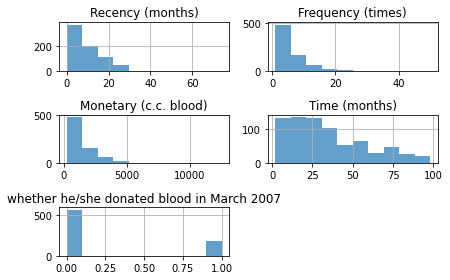

In [74]:
df.hist(alpha=0.7)
plot.tight_layout()
plot.show()

По графикам видно, что у нас есть выбросы и во всех полях у нас логнормальное распределение, а в поле `whether he/she donated blood in March 2007` у нас категориальная переменная, поэтому она так представлена.

### Density Plots (ядерные оценки плотности)

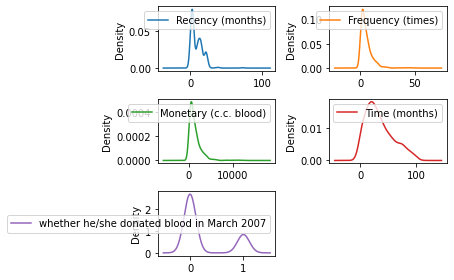

In [107]:
df.plot(kind='density', subplots=True, layout=(3,2), sharex=False)
plot.tight_layout()
plot.show()

Видно, что у нас логнормальное распределение по всех переменным.

### Box and Whisker Plots (ящики с усами)

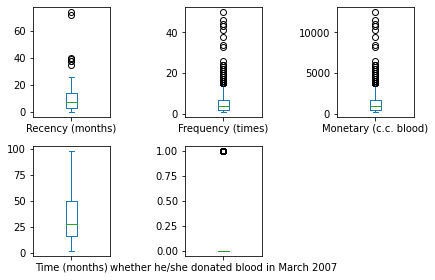

In [108]:
df.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False)
plot.tight_layout()
plot.show()

Ещё раз видна ассиметрия данных, ящик смещён вниз. Также можно заметить выбросы в переменных `Frequency (times)` и `Monetary (c.c. blood)`.

## Multivariate Plots (многомерные графики распределений)

### Correlation Matrix Plot (коррелограмма)

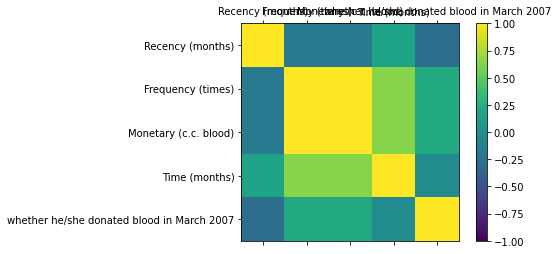

In [54]:
names = list(df.columns)
fig = plot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,5,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plot.show()

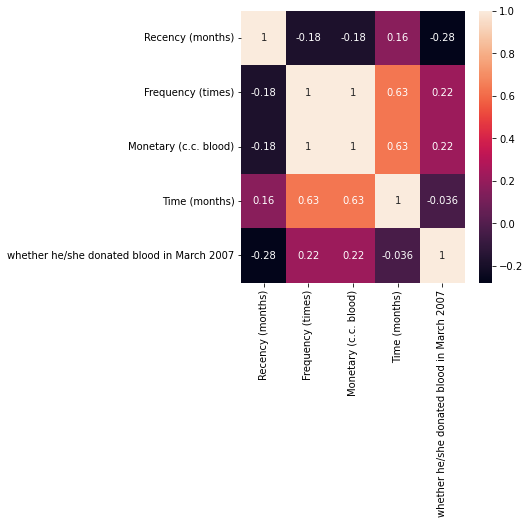

In [123]:
fig = plot.figure(figsize=(5,5))
sb.heatmap(correlations, annot=True)
plot.show()

По тепловой карте видна зависимоть между переменными `Frequency (times)` и `Monetary (c.c. blood)`.

### Scatter Plot Matrix (диаграмма рассеяния)

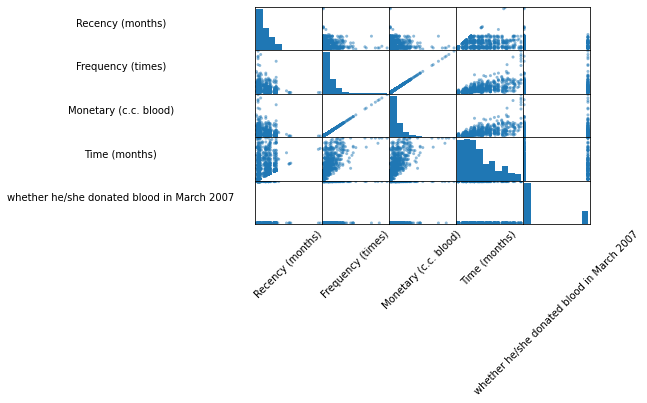

In [122]:
sm = pd.plotting.scatter_matrix(df)
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]
[s.get_yaxis().set_label_coords(-2,0.5) for s in sm.reshape(-1)]
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]
plot.show()

Можно выявить закономерности и есть ли взаимосвязи между переменными, линейные, квадратичные, показательные и т.д.<br>
В данном случае видна линейная зависимость между переменными `Frequency (times)` и `Monetary (c.c. blood)`.